# 4.10 Coding Etiquette & Excel Reporting

## Part 2:
### Question 6: Create an appropriate visualization to show the distribution of profiles.
### Question 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
### Question 9: Produce suitable charts to illustrate your results and export them in your project folder.

In [1]:
# Install libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create string of location
path = '/Users/aegarcia/Documents/Documents/01-2022 Instacart Basket Analysis/'
# Import Prepared data: orders, products, customers data
df_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data.pkl'))

## Question 6: 
### Create an appropriate visualization to show the distribution of profiles.

In [3]:
# Check variables in the data
pd.options.display.max_columns = None
df_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Beverages,Low income parent
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Dairy Eggs,Low income parent
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Household,Other


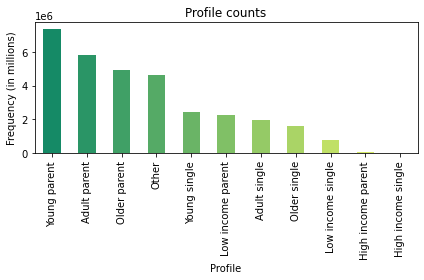

In [4]:
bar_profile_countsGR = df_final['profiling_variable'].value_counts().plot.bar(color = sns.color_palette('summer', 11), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Profile counts')
plt.tight_layout()
bar_profile_countsGR.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_counts.png'))

In [5]:
df_final.value_counts('profiling_variable')

profiling_variable
Young parent          7369160
Adult parent          5796516
Older parent          4947848
Other                 4655722
Young single          2435007
Low income parent     2277998
Adult single          1960739
Older single          1639805
Low income single      765752
High income parent      59471
High income single      21961
dtype: int64

In [6]:
# Create crosstab using the profiling_variable and order_time_group 
cross_profile_gender = pd.crosstab(df_final['profiling_variable'], df_final['gender'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_gender.to_clipboard()
# Print
cross_profile_gender

gender,Female,Male
profiling_variable,,
Adult parent,2892512,2904004
Adult single,978767,981972
High income parent,29346,30125
High income single,10527,11434
Low income parent,1116087,1161911
Low income single,377845,387907
Older parent,2461222,2486626
Older single,828349,811456
Other,2311235,2344487


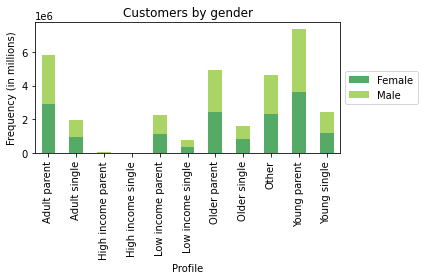

In [7]:
# Create stacked bar chart using the profiling_variable and the order_time_group
stacked_profile_gender = cross_profile_gender.plot.bar(color = sns.color_palette('summer', 2), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Customers by gender', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_gender.png'))

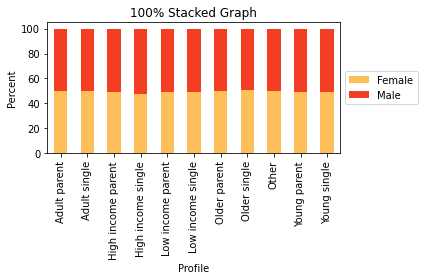

In [8]:
# Create 100% percents using the profiling_variable and the order_time_group
stacked100_profile_gender = cross_profile_gender.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 2), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_gender.png'))

In [119]:
# Create crosstab using the profiling_variable and the ordering frequency flag.
cross_profile_freq_flag = pd.crosstab(df_final['profiling_variable'], df_final['order_frequency_flag'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_freq_flag.to_clipboard()
# Print
cross_profile_freq_flag

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
profiling_variable,,,
Adult parent,3914810,597865,1283841
Adult single,1332622,194476,433641
High income parent,43228,4257,11986
High income single,15258,1305,5398
Low income parent,1468194,283706,526098
Low income single,490085,92419,183248
Older parent,3366151,495424,1086273
Older single,1119426,162601,357778
Other,3018578,544867,1092277


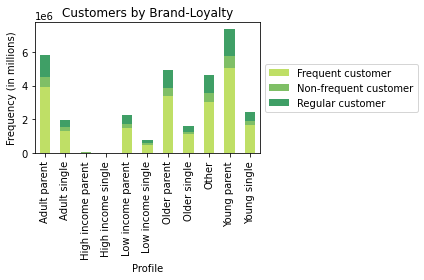

In [122]:
# Create stacked bar chart using the profiling_variable and the ordering frequency flag.
stacked_profile_freq_flag = cross_profile_freq_flag.plot.bar(color = sns.color_palette('summer_r', 3), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Customers by Brand-Loyalty', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_freq_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_freq_flag.png'))

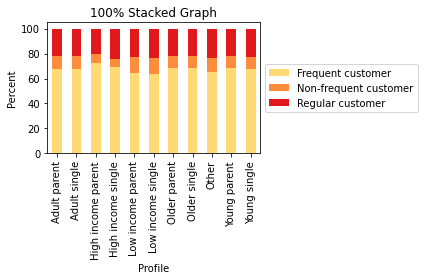

In [123]:
# Create 100% percents using the profiling_variable and thethe ordering frequency flag.
stacked100_profile_freq_flag = cross_profile_freq_flag.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 3), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_freq_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_freq_flag.png'))

In [9]:
# Create crosstab using the profiling_variable and order_time_group 
cross_profile_order_time = pd.crosstab(df_final['profiling_variable'], df_final['order_time_group'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_order_time.to_clipboard()
# Print
cross_profile_order_time

order_time_group,1 - 4hrs (Late Night),13 - 16hrs (Afternoon),17 - 20hrs (Evening),21 - 0hrs (Night),4 - 8hrs (Early Morning),9- 12hrs (Late Morning)
profiling_variable,,,,,,
Adult parent,49632,1895577,1066506,369233,536737,1878831
Adult single,16701,641032,364055,129682,181715,627554
High income parent,544,18970,11678,2490,5964,19825
High income single,770,6723,3183,1240,2522,7523
Low income parent,19884,719633,397067,127175,198497,815742
Low income single,6586,242835,126668,42965,70335,276363
Older parent,44057,1604613,915049,318913,463498,1601718
Older single,14564,535494,301230,105375,154634,528508
Other,42662,1515662,871285,291957,435969,1498187


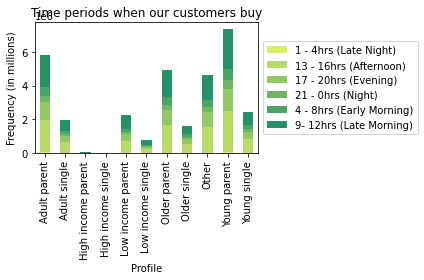

In [10]:
# Create stacked bar chart using the profiling_variable and the order_time_group
stacked_profile_order_time = cross_profile_order_time.plot.bar(color = sns.color_palette('summer_r', 6), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Time periods when our customers buy', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_order_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_order_time.png'))

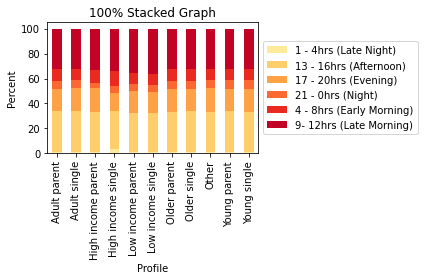

In [12]:
# Create 100% percents using the profiling_variable and the order_time_group
stacked100_profile_order_time = cross_profile_order_time.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 6), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_order_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_order_time.png'))

In [13]:
# Create crosstab using the profiling_variable and price_label 
cross_profile_price_label = pd.crosstab(df_final['profiling_variable'], df_final['price_label'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_price_label.to_clipboard()
# Print
cross_profile_price_label

price_label,High-range product,Low-range product,Mid-range product
profiling_variable,,,
Adult parent,972,1790992,121285
Adult single,283,602564,36979
High income parent,769,19554,1341
High income single,237,6937,444
Low income parent,19,966233,44704
Low income single,5,324127,13501
Older parent,807,1525510,102128
Older single,311,506343,37601
Other,403105,1183981,86949


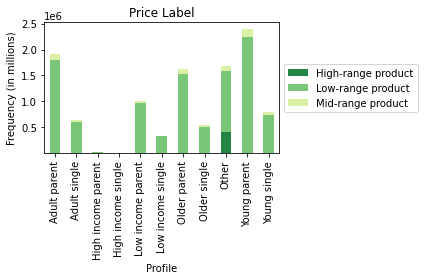

In [14]:
# Create stacked bar chart using the profiling_variable and the price_label
stacked_profile_price_label = cross_profile_price_label.plot.bar(color = sns.color_palette('YlGn_r', 3), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Price Label', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_price_label.png'))

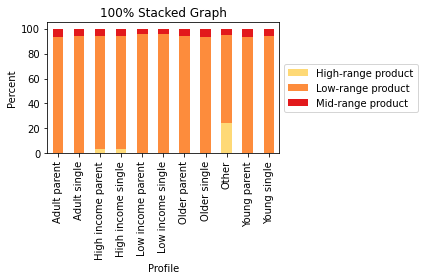

In [15]:
# Create 100% percents using the profiling_variable and the price_label
stacked100_profile_price_label = cross_profile_price_label.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 3), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_price_label.png'))

In [16]:
# Create crosstab using the profiling_variable and loyalty_flag 
cross_profile_loyalty_flag = pd.crosstab(df_final['profiling_variable'], df_final['loyalty_flag'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_loyalty_flag.to_clipboard()
# Print
cross_profile_loyalty_flag 

loyalty_flag,Loyal customer,New customer,Regular customer
profiling_variable,,,
Adult parent,1964260,852218,2980038
Adult single,690938,277571,992230
High income parent,24576,3983,30912
High income single,10118,1812,10031
Low income parent,710276,419159,1148563
Low income single,244285,139697,381770
Older parent,1695657,724734,2527457
Older single,563360,240272,836173
Other,1418398,809595,2427729


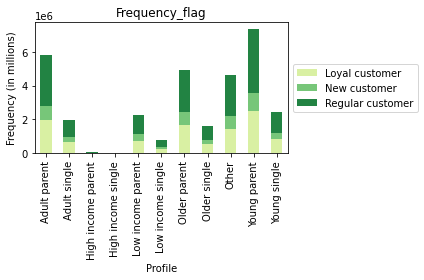

In [17]:
# Create stacked bar chart using the profiling_variable and the loyalty_flag
stacked_profile_loyalty_flag = cross_profile_loyalty_flag.plot.bar(color = sns.color_palette('YlGn', 3), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Frequency_flag', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_loyalty_flag.png'))

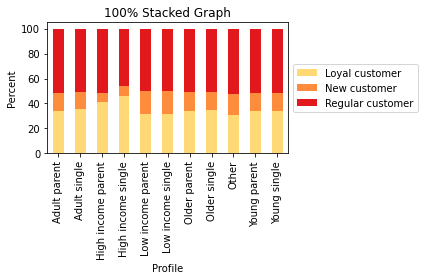

In [18]:
# Create 100% percents using the profiling_variable and the loyalty_flag
stacked100_profile_loyalty_flag = cross_profile_loyalty_flag.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 3), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_loyalty_flag.png'))

In [19]:
# Create crosstab using the profiling_variable and spending_flag 
cross_profile_spending_flag = pd.crosstab(df_final['profiling_variable'], df_final['spending_flag'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_spending_flag.to_clipboard()
# Print
cross_profile_spending_flag 

spending_flag,High Spender,Low spender
profiling_variable,,
Adult parent,99817,5696699
Adult single,29851,1930888
High income parent,59471,0
High income single,21961,0
Low income parent,1118,2276880
Low income single,543,765209
Older parent,78567,4869281
Older single,30055,1609750
Other,122121,4533601


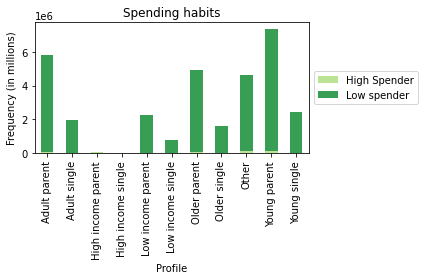

In [20]:
# Create stacked bar chart using the profiling_variable and the spending_flag
stacked_profile_spending_flag = cross_profile_spending_flag.plot.bar(color = sns.color_palette('YlGn', 2), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Spending habits', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_spending_flag.png'))

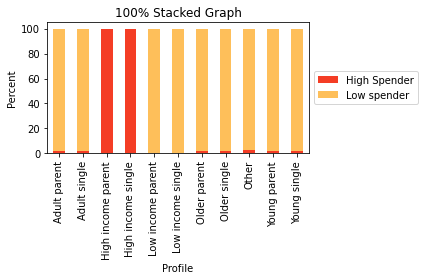

In [21]:
# Create 100% percents using the profiling_variable and the spending_flag
stacked100_profile_spending_flag = cross_profile_spending_flag.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd_r', 2), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_spending_flag.png'))

In [22]:
# Create crosstab using the profiling_variable and order_frequency_flag 
cross_profile_order_freq_flag  = pd.crosstab(df_final['profiling_variable'], df_final['order_frequency_flag'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_order_freq_flag.to_clipboard()
# Print
cross_profile_order_freq_flag 

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
profiling_variable,,,
Adult parent,3914810,597865,1283841
Adult single,1332622,194476,433641
High income parent,43228,4257,11986
High income single,15258,1305,5398
Low income parent,1468194,283706,526098
Low income single,490085,92419,183248
Older parent,3366151,495424,1086273
Older single,1119426,162601,357778
Other,3018578,544867,1092277


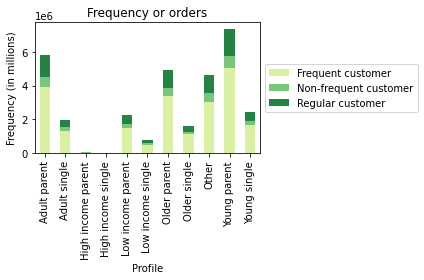

In [23]:
# Create stacked bar chart using the profiling_variable and the order_frequency_flag
stacked_profile_order_freq_flag = cross_profile_order_freq_flag.plot.bar(color = sns.color_palette('YlGn', 3), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Frequency or orders', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_order_freq_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_order_freq_flag.png'))

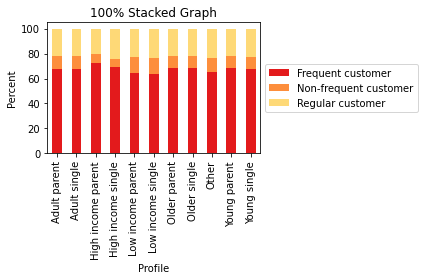

In [24]:
# Create 100% percents using the profiling_variable and the Order_frequency_flag
stacked100_profile_order_freq_flag = cross_profile_order_freq_flag.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd_r', 3), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_order_freq_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_order_freq_flag.png'))

In [25]:
# Create crosstab using the profiling_variable and day of the week 
cross_profile_weekday = pd.crosstab(df_final['profiling_variable'], df_final['weekday'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_weekday.to_clipboard()
# Print
cross_profile_weekday

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
profiling_variable,,,,,,,
Adult parent,824697,752902,1121188,1003034,742872,679700,672123
Adult single,270493,252600,386110,340607,257040,228358,225531
High income parent,7615,8191,9969,10158,7959,8207,7372
High income single,2265,2767,2920,4323,3652,3031,3003
Low income parent,255630,323770,347453,456002,319076,293320,282747
Low income single,85982,110707,113811,151566,110844,96735,96107
Older parent,704891,634349,973110,845770,638400,580494,570834
Older single,235003,209692,320493,279337,210639,195516,189125
Other,657484,606791,886476,781797,602472,564630,556072


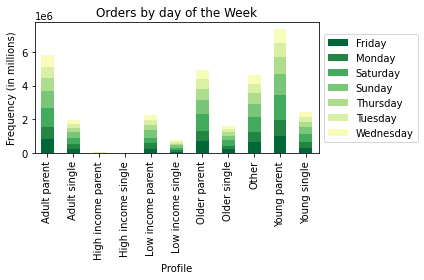

In [26]:
# Create stacked bar chart using the profiling_variable and the day of the week
stacked_profile_weekday = cross_profile_weekday.plot.bar(color = sns.color_palette('YlGn_r', 7), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Orders by day of the Week', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_weekday.png'))

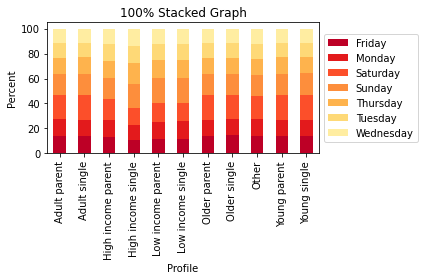

In [27]:
# Create 100% percents using the profiling_variable and the day of the week
stacked100_profile_weekday = cross_profile_weekday.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd_r', 7), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_weekday.png'))

In [28]:
# Create crosstab using the profiling_variable and Busy_days_by_orders 
cross_profile_busy_days = pd.crosstab(df_final['profiling_variable'], df_final['Busy_days_by_orders'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_busy_days.to_clipboard()
# Print
cross_profile_busy_days

Busy_days_by_orders,Busiest days,Regularly days,Slowest days
profiling_variable,,,
Adult parent,2124222,2320471,1351823
Adult single,726717,780133,453889
High income parent,20127,23765,15579
High income single,7243,8684,6034
Low income parent,803455,898476,576067
Low income single,265377,307533,192842
Older parent,1818880,1977640,1151328
Older single,599830,655334,384641
Other,1668273,1866747,1120702


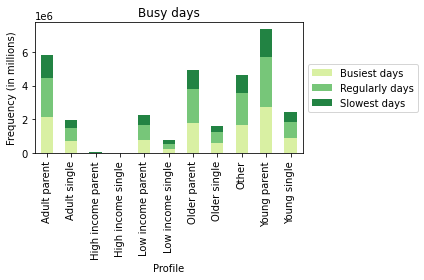

In [29]:
# Create stacked bar chart using the profiling_variable and Busy_days_by_orders
stacked_profile_busy_days = cross_profile_busy_days.plot.bar(color = sns.color_palette('YlGn', 3), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Busy days', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_busy_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_busy_days.png'))

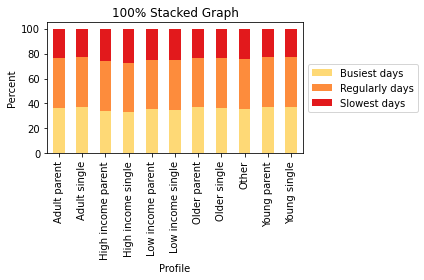

In [30]:
# Create 100% percents using the profiling_variable and Busy_days_by_orders
stacked100_profile_busy_days = cross_profile_busy_days.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd', 3), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_busy_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_busy_days.png'))

## Question 7: 
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [31]:
# Calculate the min, mean, max, sum of days_since_prior_order on a customer-profile level.
stats_profile_days_prior = df_final.groupby('profiling_variable').agg({'days_since_prior_order' : ['min', 'mean', 'max','sum']})
stats_profile_days_prior

days_since_prior_order                             
                                      min       mean   max         sum
profiling_variable                                                    
Adult parent                          0.0  10.944246  30.0  59789368.0
Adult single                          0.0  10.822684  30.0  20009952.0
High income parent                    0.0  10.253925  30.0    580567.0
High income single                    0.0   9.843538  30.0    207551.0
Low income parent                     0.0  11.343415  30.0  24191919.0
Low income single                     0.0  11.264578  30.0   8082222.0
Older parent                          0.0  10.896766  30.0  50807828.0
Older single                          0.0  10.834916  30.0  16748775.0
Other                                 0.0  11.452907  30.0  50199911.0
Young parent                          0.0  10.833907  30.0  75317276.0
Young single                          0.0  10.907678  30.0  25044781.0

In [32]:
# Calculate the min, mean, max, sum of prices of items bought on a customer-profile level.
stats_profile_prices = df_final.groupby('profiling_variable').agg({'prices' : ['min', 'mean', 'max','sum']})
stats_profile_prices

prices                                   
                      min        mean      max           sum
profiling_variable                                          
Adult parent          1.0   11.588160  99999.0  6.717095e+07
Adult single          1.0   11.804448  99999.0  2.314544e+07
High income parent    1.0  320.203154  99999.0  1.904280e+07
High income single    1.0  357.495396  99999.0  7.850956e+06
Low income parent     1.0    6.548709     20.0  1.491795e+07
Low income single     1.0    6.560449     20.0  5.023677e+06
Older parent          1.0   12.041047  99999.0  5.957727e+07
Older single          1.0   11.611454  99999.0  1.904052e+07
Other                 1.0    9.027563     25.0  4.011732e+07
Young parent          1.0   12.571621  99999.0  9.264228e+07
Young single          1.0   12.661846  99999.0  3.083168e+07

In [33]:
# Calculate the min, mean, max, sum of max_order on a customer-profile level.
stats_profile_max_order = df_final.groupby('profiling_variable').agg({'max_order' : ['min', 'mean', 'max','sum']})
stats_profile_max_order

max_order                             
                         min       mean  max          sum
profiling_variable                                       
Adult parent               5  34.900472  100  202301143.0
Adult single               5  35.854044  100   70300423.0
High income parent         5  37.686368  100    2241246.0
High income single         5  44.247985  100     971730.0
Low income parent          5  32.442518  100   73903990.0
Low income single          5  33.463132  100   25624460.0
Older parent               5  34.905741  100  172708301.0
Older single               5  35.205821  100   57730681.0
Other                      5  32.760516  100  152523853.0
Young parent               5  35.470851  100  261390380.0
Young single               5  35.058852  100   85368551.0

## Question 8: 
### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [35]:
# Create crosstab using the profiling_variable and region
cross_profile_region = pd.crosstab(df_final['profiling_variable'], df_final['region'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_region.to_clipboard()
# Print
cross_profile_region

region,Midwest,Northeast,South,West
profiling_variable,,,,
Adult parent,1363439,1034581,1907993,1490503
Adult single,470754,326236,641253,522496
High income parent,17767,7881,18653,15170
High income single,6779,4759,7568,2855
Low income parent,533610,393021,773093,578274
Low income single,174187,138080,262023,191462
Older parent,1153072,885541,1640058,1269177
Older single,384061,304176,534349,417219
Other,1094879,821323,1548700,1190820


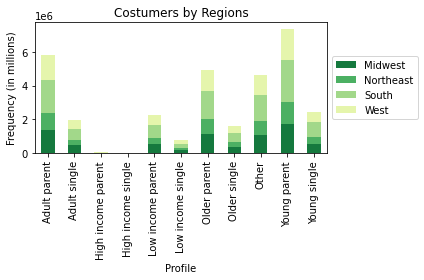

In [36]:
# Create stacked bar chart using the profiling_variable and region
stacked_profile_region = cross_profile_region.sort_index().plot.bar(color = sns.color_palette('YlGn_r', 4), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Costumers by Regions', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_region.png'))

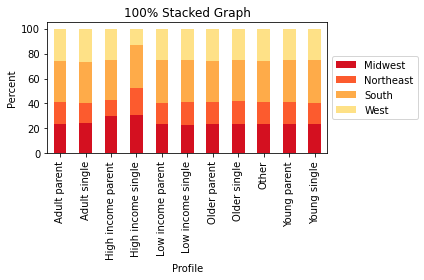

In [37]:
# Create 100% percents using the profiling_variable and region
stacked100_profile_region = cross_profile_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd_r', 4), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_region.png'))

In [39]:
# Create crosstab using the profiling_variable and department_name
cross_profile_dept = pd.crosstab(df_final['profiling_variable'], df_final['department_name'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_dept.to_clipboard()
# Print
cross_profile_dept

department_name,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned goods,Dairy Eggs,Deli,Dry goods pasta,Frozen,Household,International,Meat seafood,Missing,Other,Pantry,Personal care,Pets,Produce,Snacks
profiling_variable,,,,,,,,,,,,,,,,,,,,,
Adult parent,0,0,246101,546885,0,0,228982,1136566,218265,0,470076,0,0,0,0,0,396552,0,0,2005774,547315
Adult single,0,0,84822,183068,0,0,76367,384298,75807,0,159768,0,0,0,0,0,134038,0,0,679161,183410
High income parent,0,0,3598,6817,0,0,2796,12319,2037,0,5668,0,0,0,0,0,4531,0,0,15214,6491
High income single,0,0,1318,2551,0,0,1092,4484,784,0,2124,0,0,0,0,0,1855,0,0,5269,2484
Low income parent,0,0,83288,295936,0,0,61955,385297,82008,0,168130,0,0,0,0,0,129355,0,0,640165,431864
Low income single,0,0,27451,98507,0,0,20918,133305,28250,0,56286,0,0,0,0,0,43362,0,0,213836,143837
Older parent,0,0,211333,459438,0,0,195653,970537,187785,0,399400,0,0,0,0,0,338417,0,0,1719365,465920
Older single,0,0,69287,152968,0,0,62924,321065,62032,0,133462,0,0,0,0,0,111056,0,0,571160,155851
Other,149309,417536,0,0,687659,34011,0,0,0,845368,0,720087,262920,692678,67034,35403,0,436395,95470,0,0


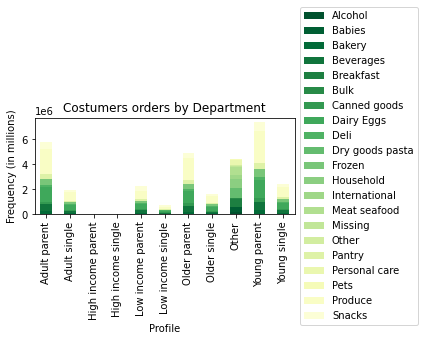

In [40]:
# Create stacked bar chart using the profiling_variable and department_name
stacked_profile_dept = cross_profile_dept.plot.bar(color = sns.color_palette('YlGn_r', 21), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Costumers orders by Department', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_dept.png'))

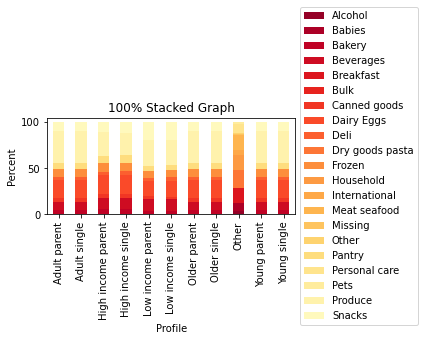

In [41]:
# Create 100% percents using the profiling_variable and departmnet_name
stacked100_profile_dept = cross_profile_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrRd_r', 21), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked100_profile_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_dept.png'))

## Question 9: 
### Produce suitable charts to illustrate your results and export them in your project folder.

In [43]:
df_final.describe()

,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,frequency_of_orders,age,num_dependents,income
count,3.192998e+07,3.192998e+07,3.192998e+07,3.007955e+07,3.174776e+07,3.174776e+07,3.174776e+07,3.171813e+07,3.171813e+07,3.171813e+07,3.192998e+07,3.192998e+07,3.192998e+07,3.192998e+07,3.192998e+07,3.192998e+07
mean,1.747409e+01,2.740343e+00,1.341951e+01,1.100350e+01,2.557630e+04,8.356248e+00,5.980359e-01,7.119179e+01,9.920806e+00,1.196038e+01,3.460900e+01,1.196174e+01,1.022096e+01,4.946709e+01,1.501830e+00,9.953343e+04
std,1.757683e+01,2.089913e+00,4.247642e+00,8.711371e+00,1.409520e+04,7.130957e+00,4.902948e-01,3.821591e+01,6.281934e+00,4.939463e+02,2.502192e+01,8.204553e+01,6.931400e+00,1.848690e+01,1.118833e+00,4.308692e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.500000e+01,7.389583e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.712400e+04
50%,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825000e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.667400e+04
75%,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.900000e+01,8.252408e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279750e+05
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,1.000000e+02,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [44]:
df_final['user_id']

0                1
1                1
2                1
3                1
4                1
             ...  
32641263    206209
32641264    206209
32641265    206209
32641266    206209
32641267    206209
Name: user_id, Length: 31929979, dtype: category
Categories (206209, int64): [1, 2, 3, 4, ..., 206206, 206207, 206208, 206209]

In [45]:
df_final['order_number']

0            1
1            1
2            1
3            1
4            1
            ..
32641263    13
32641264    13
32641265    13
32641266    13
32641267    14
Name: order_number, Length: 31929979, dtype: int16

## The following graphs will display all customers, not only from the profiles created above.

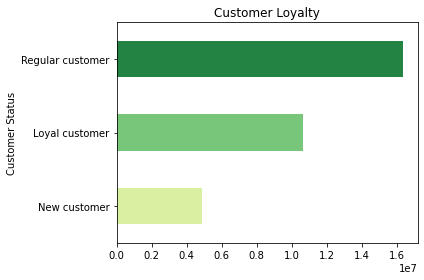

In [46]:
# Bar graph showing all customers by loyalty status
barh_loyalty = df_final['loyalty_flag'].value_counts().sort_values().plot.barh(color = sns.color_palette('YlGn', 3), xlabel= 'Customer Status', title = 'Customer Loyalty')
plt.tight_layout()
# Save it
barh_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_loyalty.png'))

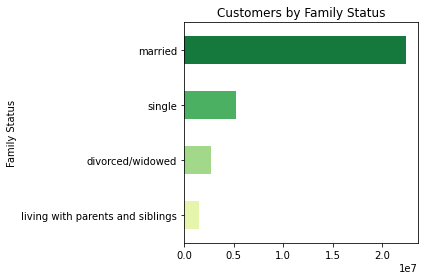

In [47]:
# Create bar graph to show the number of customers by family status 
bar_family = df_final['fam_status'].value_counts().sort_values().plot.barh(color = sns.color_palette('YlGn', 4) , xlabel= 'Family Status', title = 'Customers by Family Status')
plt.tight_layout()
# Save it                                                                 
bar_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family.png'))

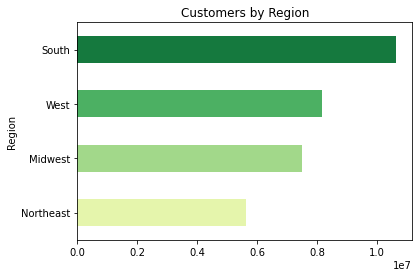

In [48]:
# Create bar graph to show the number of customers by region 
bar_region = df_final['region'].value_counts().sort_values().plot.barh(color = sns.color_palette('YlGn', 4) , xlabel= 'Region', title = 'Customers by Region')

# Save it                                                                 
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

### KEY Question 1: Busiest day of the week

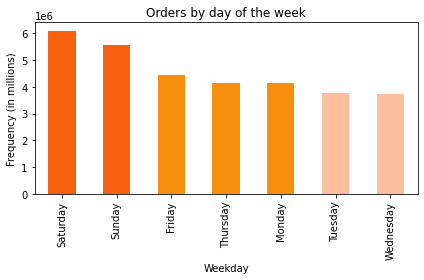

In [52]:
# Create bar graph to show orders by the of the week 
bar_weekdays = df_final['weekday'].value_counts().plot.bar(color = ('#f6600e', '#f6600e', '#f68f0e', '#f68f0e', '#f68f0e', '#FBBF9E', '#FBBF9E') , xlabel= 'Weekday', ylabel= 'Frequency (in millions)', title = 'Orders by day of the week')
plt.tight_layout()
# Save it                                                                 
bar_weekdays.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [53]:
# Assign a random number and separate data into 70/30
np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7# Create 2 samples. big contains aprox 70% of data [0, 0.7]. 
# small contain approx 30% od data (0.7, 1].
big = df_final[dev]
small = df_final[~dev]

In [54]:
#Check length of all data
len(df_final)

31929979

In [55]:
# Must be equal to both sets
len(big)+len(small)

31929979

In [56]:
# Create a "small" sample of dataframe contining only the 2 columns needed
df_small_final = small[['orders_day_of_week','prices']]

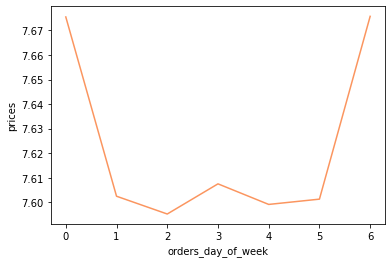

In [57]:
# Create line graph using the day of the week and prices
line_weekday_prices = sns.lineplot(data = df_small_final, color = '#fb955f', x = 'orders_day_of_week', y = 'prices')
# plt.tight_layout()
# Save it                                                                 
line_weekday_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_weekday_prices.png'))

In [58]:
df_final['orders_day_of_week'].value_counts(dropna = False)

0    6107725
1    5572954
6    4428913
5    4152834
2    4147880
3    3785966
4    3733707
Name: orders_day_of_week, dtype: int64

### KEY Question 2: Time of the day when people spend the most money.

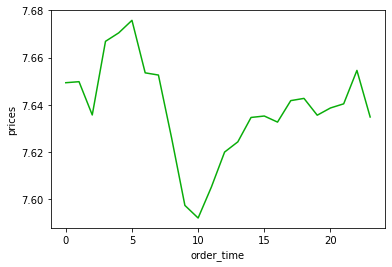

In [59]:
# Create a dataframe containing only the 2 columns needed
df_expenditure = df_final[['order_time','prices']]
line_exp = sns.lineplot(data = df_expenditure, color = '#0aad0a', x = 'order_time',y = 'prices')
# Save it
line_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

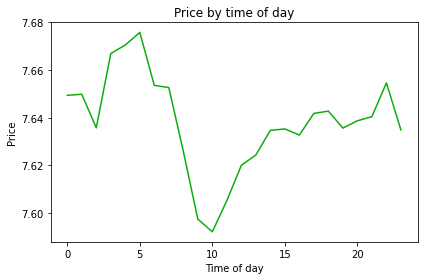

In [71]:
# Another way to get the same graph, but faster!
# Mean price per hour
mean_prices_hour = df_final.groupby('order_time').agg({'prices': ['mean']})
# Create line graph
line_time_prices = mean_prices_hour.plot.line(color = '#0aad0a', xlabel= 'Time of day', ylabel= 'Price', title = 'Price by time of day', legend=False)
plt.tight_layout()
# Save it                                                                 
line_time_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_time_prices.png'))

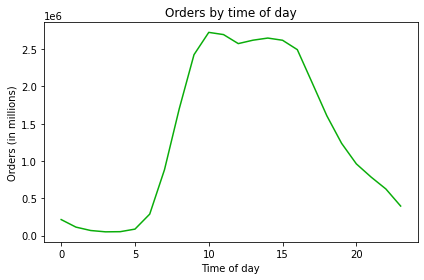

In [74]:
# Create lin graph showing the number of orders per hour in a day
count_orders_hour = df_final.groupby('order_time').agg({'order_number': ['count']})
# Create line graph
line_count_orders_hour = count_orders_hour.plot.line(color = '#0aad0a', xlabel= 'Time of day', ylabel= 'Orders (in millions)', title = 'Orders by time of day', legend=False)
plt.tight_layout()
# Save it                                                                 
line_count_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_count_orders_hour.png'))

### KEY Question 3: Use a different price-range-grouping to help the Marketing and Sales departments

In [49]:
# Mark values greater than 100 dlls as 'NAN' since they are incorrect
df_final.loc[df_final['prices'] >15, 'prices'] = np.nan

In [50]:
# Check for the new maximum value
df_final['prices'].max()

15.0

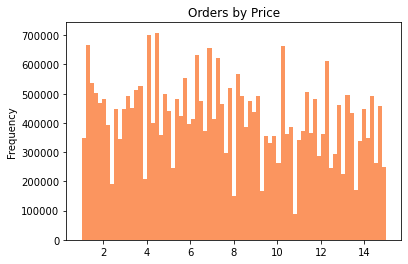

In [51]:
hist_prices = df_final['prices'].plot.hist(bins = 75, color = '#fb955f', xlabel= 'Price', ylabel= 'Frequency(in millions)', title = 'Orders by Price')
# plt.tight_layout()
# Save it                                                                 
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

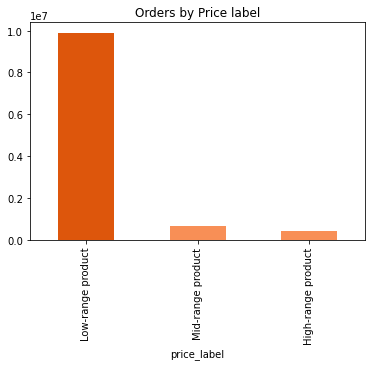

In [80]:
# Create bar graph to show the number of orders by price_label 
bar_price_label = df_final['price_label'].value_counts().plot.bar(color = ['#DD560C', '#F88F56', '#F88F56'], xlabel= 'price_label', title = 'Orders by Price label')

# Save it                                                                 
bar_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_label.png'))

## KEY Question 4: Are cetain products more popular than others?

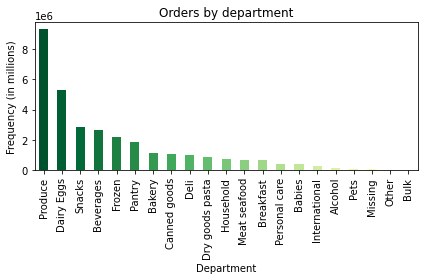

In [82]:
bar_product_counts = df_final['department_name'].value_counts().plot.bar(color = sns.color_palette('YlGn_r', 21), xlabel= 'Department', ylabel= 'Frequency (in millions)', title = 'Orders by department')
plt.tight_layout()
# Save it
bar_product_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))

In [88]:
# Which items are the most popular?
counts_products = df_final['product_name'].value_counts()
counts_products.to_clipboard()
counts_products

Banana                                                 463436
Bag of Organic Bananas                                 373251
Organic Strawberries                                   260533
Organic Baby Spinach                                   237020
Organic Hass Avocado                                   210428
                                                        ...  
Jarro-Dophilus + Fos 3.4 Billion 6 Strains capsules         0
Seltzer Blueberry Lemonade                                  0
Grape Flavor Pediatric Electrolyte With Zinc                0
Bite Size Caramel Chocolates                                0
Coconut Cardamom Almond Butter                              0
Name: product_name, Length: 49661, dtype: int64

In [98]:
count_prod_dept = df_final.groupby('department_name').agg({'product_name': ['count']})
count_prod_dept

,product_name
,count
department_name,
Alcohol,149309
Babies,417536
Bakery,1147983
Beverages,2633114
Breakfast,687659
Bulk,34011
Canned goods,1041171
Dairy Eggs,5292745


In [100]:
# Create another column to show if the item is from the top 5 departments
df_final.loc[df_final['department_id'].isin([4,16,19,7,1]), 'top_department'] = 'Top 5 department'

In [101]:
# Check last column
df_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable,top_department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Beverages,Low income parent,Top 5 department
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Dairy Eggs,Low income parent,Top 5 department
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Household,Other,NaN


In [102]:
# Get a count
df_final['top_department'].value_counts()

Top 5 department    22225273
Name: top_department, dtype: int64

In [103]:
# Replace NANs with 'other'
df_final['top_department'].fillna('Other', inplace=True)

In [104]:
# Check counts again
df_final['top_department'].value_counts()

Top 5 department    22225273
Other                9704706
Name: top_department, dtype: int64

In [109]:
# Create crosstab using the profiling_variable and department_name
cross_dept_weekday = pd.crosstab(df_final['weekday'], df_final['top_department'], dropna = False)
# Save to clipboard to use on Excel
cross_dept_weekday.to_clipboard()
# Print
cross_dept_weekday

top_department,Other,Top 5 department
weekday,,
Friday,1387860,3041053
Monday,1252026,2895854
Saturday,1876689,4231036
Sunday,1634832,3938122
Thursday,1253864,2898970
Tuesday,1159053,2626913
Wednesday,1140382,2593325


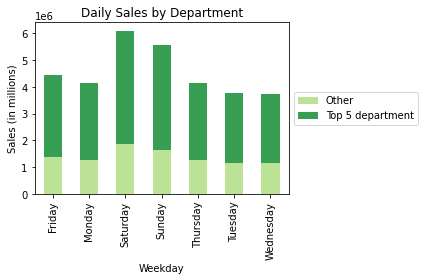

In [112]:
# Create stacked bar chart using the the top_department and the weekday
stacked_dept_weekday = cross_dept_weekday.plot.bar(color = sns.color_palette('YlGn', 2), xlabel= 'Weekday', ylabel= 'Sales (in millions)', title = 'Daily Sales by Department', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_dept_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_dept_weekday.png'))

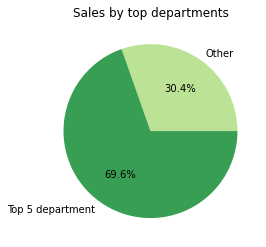

In [118]:
# Create pie chart of top5 dept ant others
pie_top_dept = df_final['top_department'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('YlGn', 2), title= 'Sales by top departments')
plt.ylabel('')
# Save it
pie_top_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_top_dept.png'))

### KEY Question 5:

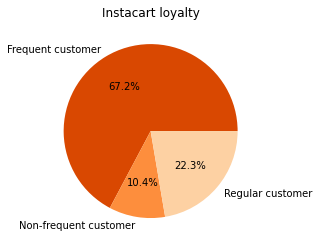

In [218]:
# Create pie chart of brand-loyalty
pie_freq_flag = df_final['order_frequency_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Oranges_r', 3), title= 'Instacart loyalty')
plt.ylabel('')
# Save it
pie_freq_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_freq_flag.png'))

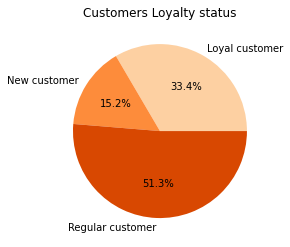

In [131]:
# Create pie chart of the customers loyalty status
pie_loyalty = df_final['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Oranges', 3), title= 'Customers Loyalty status')
plt.ylabel('')
# Save it
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

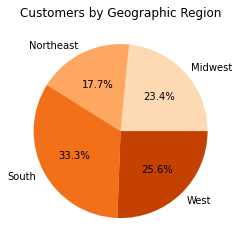

In [132]:
# Create pie chart of region where customers live
pie_region = df_final['region'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Oranges', 4), title= 'Customers by Geographic Region')
plt.ylabel('')
# Save it
pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region.png'))

### Is there a connection between age and family status in terms of ordering habits?

In [141]:
# Create crosstab using the of age and family status with the spending habits of customers
cross_fam_age = pd.crosstab([df_final.fam_status, df_final.age_group], df_final.spending_flag)
# Save to clipboard to use on Excel
cross_fam_age.to_clipboard()
# Print
cross_fam_age

spending_flag                               High Spender  Low spender
fam_status                       age_group                           
divorced/widowed                 55 - 64            8946       633479
                                 65 - 74           22201      1191965
                                 75 - 84           20534       853423
living with parents and siblings 18 - 24           28933      1499667
married                          18 - 24           22736      1120317
                                 25 - 34           68243      3634258
                                 35 - 44           79790      3668087
                                 45 - 54           75994      3727182
                                 55 - 64           78288      3584232
                                 65 - 74           64441      3651994
                                 75 - 84           54726      2591564
single                           18 - 24           17236       833679
                                 25 - 34           17554      1257749
                                 35 - 44           22833      1217224
                                 45 - 54           30212      1204365
                                 55 - 64           11053       637074

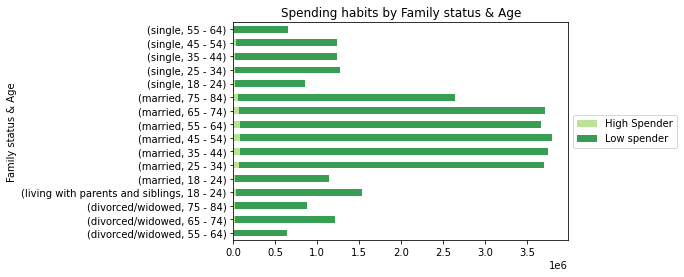

In [153]:
# Create stacked bar chart using the of age and family status with the spending habits of customers
stacked_fam_age = cross_fam_age.plot.barh(color = sns.color_palette('YlGn', 2), xlabel= 'Family status & Age', ylabel= 'Frequency (in millions)', title = 'Spending habits by Family status & Age', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save it
stacked_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_fam_age.png'))

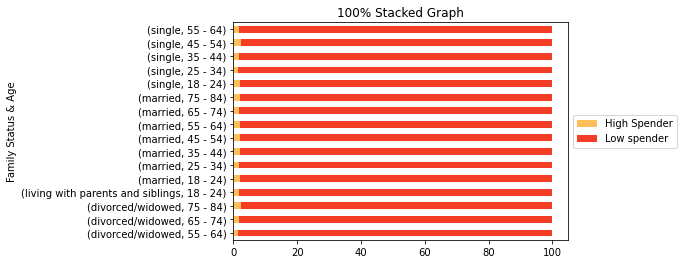

In [151]:
# Create 100% percents using the the of age and family status with the spending habits of customers
stacked100_fam_age = cross_fam_age.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'barh', stacked = True, color = sns.color_palette('YlOrRd', 2), xlabel= 'Family Status & Age', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save it
stacked100_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_fam_age.png'))

In [155]:
# Create another group of income. Values vary between $25,903 - $593,901
df_final.loc[(df_final['income'] < 50000), 'income_group2'] = '< 50,000'
df_final.loc[(df_final['income'] >= 50000) & (df_final['income'] < 150000), 'income_group2'] = '50,000 - 149,999'
df_final.loc[(df_final['income'] >= 150000) & (df_final['income'] < 250000), 'income_group2'] = '150,000 - 249,999'
df_final.loc[(df_final['income'] >= 250000) & (df_final['income'] < 350000), 'income_group2'] = '250,000 - 349,999'
df_final.loc[(df_final['income'] >= 3500000) & (df_final['income'] < 450000), 'income_group2'] = '350,000 - 449,999'
df_final.loc[(df_final['income'] >= 450000), 'income_group2'] = '500,000+'

In [161]:
df_final['income_group2'].value_counts().sort_index()

150,000 - 249,999     3818686
250,000 - 349,999      108156
50,000 - 149,999     24418036
500,000+                28240
< 50,000              3511073
Name: income_group2, dtype: int64

In [160]:
# Create another age group. Values vary between 18 - 81
df_final.loc[(df_final['age'] < 25), 'age_group2'] = 'Young'
df_final.loc[(df_final['age'] >= 25) & (df_final['age'] < 45), 'age_group2'] = 'Young Adults'
df_final.loc[(df_final['age'] >= 45) & (df_final['age'] < 65), 'age_group2'] = 'Old Adults'
df_final.loc[(df_final['age'] >= 65) , 'age_group2'] = 'Old'

In [162]:
df_final['age_group2'].value_counts().sort_index()

Old             8450848
Old Adults      9990825
Young           3522568
Young Adults    9965738
Name: age_group2, dtype: int64

In [163]:
# Create crosstab using the age, income and top5 departments
cross_age_income_dept = pd.crosstab([df_final.age_group2, df_final.income_group2], df_final.top_department)
# Save to clipboard to use on Excel
cross_age_income_dept.to_clipboard()
# Print
cross_age_income_dept

top_department                    Other  Top 5 department
age_group2   income_group2                               
Old          150,000 - 249,999   475395           1056472
             250,000 - 349,999    12617             21744
             50,000 - 149,999   1882121           4274173
             500,000+              4132              7281
             < 50,000            184185            522104
Old Adults   150,000 - 249,999   569489           1265776
             250,000 - 349,999    15835             28201
             50,000 - 149,999   2220941           5008720
             500,000+              5400              8679
             < 50,000            220605            627058
Young        150,000 - 249,999     8767             14913
             250,000 - 349,999     2787              3436
             50,000 - 149,999    912270           2030688
             < 50,000            151999            395513
Young Adults 150,000 - 249,999   135513            292361
             250,000 - 349,999     8481             15055
             50,000 - 149,999   2488594           5600529
             500,000+               921              1827
             < 50,000            387121           1022488

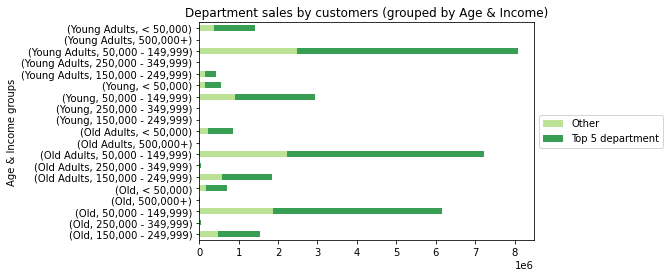

In [165]:
# Create stacked bar chart using the age, income and top5 departments
stacked_age_income_dept = cross_age_income_dept.plot.barh(color = sns.color_palette('YlGn', 2), xlabel= 'Age & Income groups', ylabel= 'Frequency (in millions)', title = 'Department sales by customers (grouped by Age & Income)', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save it
stacked_age_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_age_income_dept.png'))

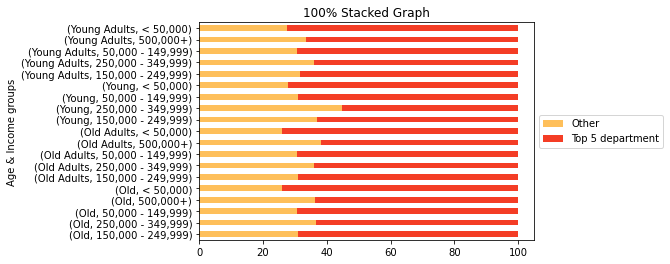

In [166]:
# Create 100% percents using the age, income and top5 departments
stacked100_age_income_dept = cross_age_income_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'barh', stacked = True, color = sns.color_palette('YlOrRd', 2), xlabel= 'Age & Income groups', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save it
stacked100_age_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_age_income_dept.png'))

## Recommendations

### KEY QUestion 1:

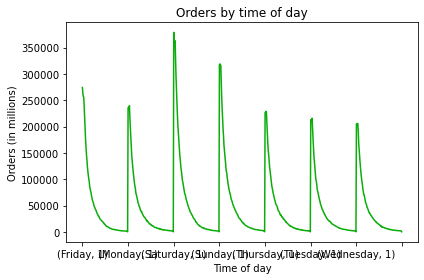

In [171]:
# Another way to get the same graph, but faster!
count_day_order = df_final.groupby(['weekday', 'order_number']).agg({'order_time_group': ['count']})
# Create line graph
line_day_order = count_day_order.plot.line(color = '#0aad0a', xlabel= 'Time of day', ylabel= 'Orders (in millions)', title = 'Orders by time of day', legend=False)
plt.tight_layout()
# Save it                                                                 
line_day_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

In [211]:
count_day_order = df_final.groupby(['weekday', 'order_time_group']).agg({'order_number': ['count']})
count_day_order.to_clipboard()
count_day_order

order_number
                                          count
weekday   order_time_group                     
Friday    1 - 4hrs (Late Night)           44779
          13 - 16hrs (Afternoon)        1479217
          17 - 20hrs (Evening)           811164
          21 - 0hrs (Night)              293992
          4 - 8hrs (Early Morning)       395598
          9- 12hrs (Late Morning)       1404163
Monday    1 - 4hrs (Late Night)           36190
          13 - 16hrs (Afternoon)        1311987
          17 - 20hrs (Evening)           790394
          21 - 0hrs (Night)              261779
          4 - 8hrs (Early Morning)       398116
          9- 12hrs (Late Morning)       1349414
Saturday  1 - 4hrs (Late Night)           51498
          13 - 16hrs (Afternoon)        2138626
          17 - 20hrs (Evening)          1061629
          21 - 0hrs (Night)              378350
          4 - 8hrs (Early Morning)       481838
          9- 12hrs (Late Morning)       1995784
Sunday    1 - 4hrs (Late Night)           43083
          13 - 16hrs (Afternoon)        1740570
          17 - 20hrs (Evening)           929112
          21 - 0hrs (Night)              300687
          4 - 8hrs (Early Morning)       559469
          9- 12hrs (Late Morning)       2000033
Thursday  1 - 4hrs (Late Night)           40873
          13 - 16hrs (Afternoon)        1334107
          17 - 20hrs (Evening)           769601
          21 - 0hrs (Night)              257639
          4 - 8hrs (Early Morning)       410317
          9- 12hrs (Late Morning)       1340297
Tuesday   1 - 4hrs (Late Night)           34102
          13 - 16hrs (Afternoon)        1208233
          17 - 20hrs (Evening)           747850
          21 - 0hrs (Night)              255566
          4 - 8hrs (Early Morning)       358088
          9- 12hrs (Late Morning)       1182127
Wednesday 1 - 4hrs (Late Night)           34355
          13 - 16hrs (Afternoon)        1170773
          17 - 20hrs (Evening)           749148
          21 - 0hrs (Night)              273251
          4 - 8hrs (Early Morning)       355703
          9- 12hrs (Late Morning)       1150477

In [180]:
# Create crosstab using the spending_flag and weekday
cross_spend_weekday = pd.crosstab(df_final['weekday'], df_final['spending_flag'], dropna = False)
# Save to clipboard to use on Excel
cross_spend_weekday.to_clipboard()
# Print
cross_spend_weekday

spending_flag,High Spender,Low spender
weekday,,
Friday,79505,4349408
Monday,85145,4062735
Saturday,104629,6003096
Sunday,112410,5460544
Thursday,85960,4066874
Tuesday,78745,3707221
Wednesday,77326,3656381


### KEY Question 2:

In [183]:
day_order_mean_prices = df_final.groupby(['weekday', 'order_time_group']).agg({'prices': ['mean']})
day_order_mean_prices.to_clipboard()
day_order_mean_prices

prices
                                        mean
weekday   order_time_group                  
Friday    1 - 4hrs (Late Night)     7.667836
          13 - 16hrs (Afternoon)    7.674914
          17 - 20hrs (Evening)      7.672990
          21 - 0hrs (Night)         7.675751
          4 - 8hrs (Early Morning)  7.682202
          9- 12hrs (Late Morning)   7.675724
Monday    1 - 4hrs (Late Night)     7.626305
          13 - 16hrs (Afternoon)    7.608613
          17 - 20hrs (Evening)      7.631693
          21 - 0hrs (Night)         7.620348
          4 - 8hrs (Early Morning)  7.627935
          9- 12hrs (Late Morning)   7.556534
Saturday  1 - 4hrs (Late Night)     7.682521
          13 - 16hrs (Afternoon)    7.678329
          17 - 20hrs (Evening)      7.654827
          21 - 0hrs (Night)         7.658847
          4 - 8hrs (Early Morning)  7.678591
          9- 12hrs (Late Morning)   7.689950
Sunday    1 - 4hrs (Late Night)     7.619679
          13 - 16hrs (Afternoon)    7.624020
          17 - 20hrs (Evening)      7.648287
          21 - 0hrs (Night)         7.634823
          4 - 8hrs (Early Morning)  7.593273
          9- 12hrs (Late Morning)   7.553357
Thursday  1 - 4hrs (Late Night)     7.691484
          13 - 16hrs (Afternoon)    7.591497
          17 - 20hrs (Evening)      7.628665
          21 - 0hrs (Night)         7.651852
          4 - 8hrs (Early Morning)  7.630483
          9- 12hrs (Late Morning)   7.577839
Tuesday   1 - 4hrs (Late Night)     7.642017
          13 - 16hrs (Afternoon)    7.607951
          17 - 20hrs (Evening)      7.622818
          21 - 0hrs (Night)         7.622790
          4 - 8hrs (Early Morning)  7.628035
          9- 12hrs (Late Morning)   7.570760
Wednesday 1 - 4hrs (Late Night)     7.627362
          13 - 16hrs (Afternoon)    7.600689
          17 - 20hrs (Evening)      7.612890
          21 - 0hrs (Night)         7.639919
          4 - 8hrs (Early Morning)  7.635176
          9- 12hrs (Late Morning)   7.573625

### KEY Question 3:

In [190]:
# Create a new price tag
df_final.loc[df_final['prices'] <= 4, 'new_price_label'] = 'Low-range product'
df_final.loc[(df_final['prices'] > 4) & (df_final['prices'] <= 8), 'new_price_label'] = 'Mid-range product' 
df_final.loc[df_final['prices'] > 8, 'new_price_label'] = 'High-range product'

In [191]:
# Counting all types of product:
df_final['new_price_label'].value_counts(dropna = False)

High-range product    14068066
Mid-range product      9781232
Low-range product      7460493
NaN                     620188
Name: new_price_label, dtype: int64

In [195]:
# Impute 'no_info' in nans
df_final['new_price_label'].fillna('no_info', inplace=True)

In [196]:
# Counting all types of product:
df_final['new_price_label'].value_counts(dropna = False)

High-range product    14068066
Mid-range product      9781232
Low-range product      7460493
no_info                 620188
Name: new_price_label, dtype: int64

In [198]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable,top_department,income_group2,age_group2,new_price_label
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Beverages,Low income parent,Top 5 department,"< 50,000",Young Adults,High-range product
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Dairy Eggs,Low income parent,Top 5 department,"< 50,000",Young Adults,High-range product
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department,"< 50,000",Young Adults,Mid-range product
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department,"< 50,000",Young Adults,Mid-range product
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Household,Other,Other,"< 50,000",Young Adults,Low-range product


In [199]:
# Create crosstab using the profiling_variable and new_price_label
cross_profile_new_label = pd.crosstab(df_final['profiling_variable'], df_final['new_price_label'], dropna = False)
# Save to clipboard to use on Excel
cross_profile_new_label.to_clipboard()
# Print
cross_profile_new_label

new_price_label,High-range product,Low-range product,Mid-range product,no_info
profiling_variable,,,,
Adult parent,2629166,1333802,1832576,972
Adult single,891121,447951,621384,283
High income parent,25078,14991,18633,769
High income single,9579,5130,7015,237
Low income parent,757635,744858,775486,19
Low income single,256783,250422,258542,5
Older parent,2244869,1139875,1562297,807
Older single,745305,377719,516470,311
Other,2022207,921252,1097306,614957


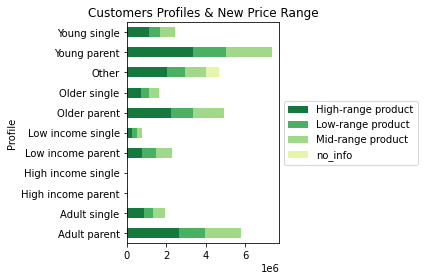

In [206]:
# Create stacked bar chart using the profiling_variable and new_price_label
stacked_profile_new_label = cross_profile_new_label.plot.barh(color = sns.color_palette('YlGn_r', 4), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Customers Profiles & New Price Range', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# Save it
stacked_profile_new_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_profile_new_label.png'))

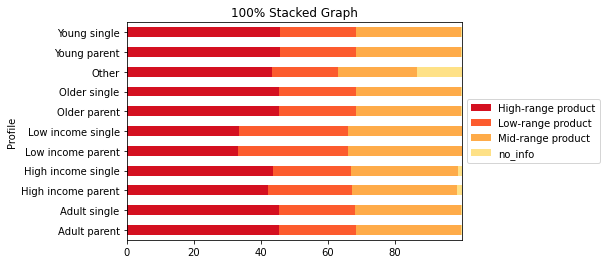

In [209]:
# Create 100% percents using the the profiling_variable and new_price_label
stacked100_profile_new_label = cross_profile_new_label.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'barh', stacked = True, color = sns.color_palette('YlOrRd_r', 4), xlabel= 'Profile', ylabel= 'Percent', title = '100% Stacked Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save it
stacked100_profile_new_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked100_profile_new_label.png'))

### KEY Question 4:

In [213]:
# Create 2 subsets, top 5 dept and not top 5 dept
df_top5 = df_final.loc[df_final['top_department']== 'Top 5 department']
df_not_top5 = df_final.loc[df_final['top_department'] == 'Other']

In [214]:
df_top5.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable,top_department,income_group2,age_group2,new_price_label
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Beverages,Low income parent,Top 5 department,"< 50,000",Young Adults,High-range product
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Dairy Eggs,Low income parent,Top 5 department,"< 50,000",Young Adults,High-range product
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department,"< 50,000",Young Adults,Mid-range product
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Snacks,Low income parent,Top 5 department,"< 50,000",Young Adults,Mid-range product
5,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Tuesday,Beverages,Low income parent,Top 5 department,"< 50,000",Young Adults,High-range product


In [215]:
df_not_top5.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable,top_department,income_group2,age_group2,new_price_label
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Monday,Household,Other,Other,"< 50,000",Young Adults,Low-range product
10,2398795,1,2,3,7,15.0,13032.0,6.0,0.0,Cinnamon Toast Crunch,121.0,14.0,4.0,Low-range product,Slowest days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Tuesday,Breakfast,Other,Other,"< 50,000",Young Adults,Low-range product
15,473747,1,3,3,12,21.0,30450.0,5.0,0.0,Creamy Almond Butter,88.0,13.0,3.2,Low-range product,Slowest days,Most orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,9- 12hrs (Late Morning),Tuesday,Pantry,Low income parent,Other,"< 50,000",Young Adults,Low-range product
20,2254736,1,4,4,7,29.0,26405.0,5.0,1.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Slowest days,Average orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,4 - 8hrs (Early Morning),Wednesday,Household,Other,Other,"< 50,000",Young Adults,Low-range product
37,550135,1,7,1,9,20.0,13032.0,5.0,1.0,Cinnamon Toast Crunch,121.0,14.0,4.0,Low-range product,Busiest days,Most orders,11,Regular customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high_activity_customer,25 - 34,"< 50,000",Parent,9- 12hrs (Late Morning),Sunday,Breakfast,Other,Other,"< 50,000",Young Adults,Low-range product


In [216]:
# Get information on the top 5 departments
top5_dept = df_top5.groupby(['weekday', 'order_time_group']).agg({'top_department': ['count']})
top5_dept.to_clipboard()
top5_dept

top_department
                                            count
weekday   order_time_group                       
Friday    1 - 4hrs (Late Night)             30422
          13 - 16hrs (Afternoon)          1013110
          17 - 20hrs (Evening)             559927
          21 - 0hrs (Night)                206190
          4 - 8hrs (Early Morning)         272380
          9- 12hrs (Late Morning)          959024
Monday    1 - 4hrs (Late Night)             24752
          13 - 16hrs (Afternoon)           912340
          17 - 20hrs (Evening)             546211
          21 - 0hrs (Night)                181499
          4 - 8hrs (Early Morning)         280106
          9- 12hrs (Late Morning)          950946
Saturday  1 - 4hrs (Late Night)             35855
          13 - 16hrs (Afternoon)          1478176
          17 - 20hrs (Evening)             741626
          21 - 0hrs (Night)                267271
          4 - 8hrs (Early Morning)         334112
          9- 12hrs (Late Morning)         1373996
Sunday    1 - 4hrs (Late Night)             30235
          13 - 16hrs (Afternoon)          1216874
          17 - 20hrs (Evening)             645819
          21 - 0hrs (Night)                210135
          4 - 8hrs (Early Morning)         402467
          9- 12hrs (Late Morning)         1432592
Thursday  1 - 4hrs (Late Night)             28016
          13 - 16hrs (Afternoon)           932829
          17 - 20hrs (Evening)             535020
          21 - 0hrs (Night)                179780
          4 - 8hrs (Early Morning)         285613
          9- 12hrs (Late Morning)          937712
Tuesday   1 - 4hrs (Late Night)             23408
          13 - 16hrs (Afternoon)           835338
          17 - 20hrs (Evening)             516476
          21 - 0hrs (Night)                176926
          4 - 8hrs (Early Morning)         250315
          9- 12hrs (Late Morning)          824450
Wednesday 1 - 4hrs (Late Night)             23502
          13 - 16hrs (Afternoon)           812156
          17 - 20hrs (Evening)             519158
          21 - 0hrs (Night)                190351
          4 - 8hrs (Early Morning)         247717
          9- 12hrs (Late Morning)          800441

In [217]:
# Get information on the NOT-top 5 departments
not_top5_dept = df_not_top5.groupby(['weekday', 'order_time_group']).agg({'top_department': ['count']})
not_top5_dept.to_clipboard()
not_top5_dept

top_department
                                            count
weekday   order_time_group                       
Friday    1 - 4hrs (Late Night)             14357
          13 - 16hrs (Afternoon)           466107
          17 - 20hrs (Evening)             251237
          21 - 0hrs (Night)                 87802
          4 - 8hrs (Early Morning)         123218
          9- 12hrs (Late Morning)          445139
Monday    1 - 4hrs (Late Night)             11438
          13 - 16hrs (Afternoon)           399647
          17 - 20hrs (Evening)             244183
          21 - 0hrs (Night)                 80280
          4 - 8hrs (Early Morning)         118010
          9- 12hrs (Late Morning)          398468
Saturday  1 - 4hrs (Late Night)             15643
          13 - 16hrs (Afternoon)           660450
          17 - 20hrs (Evening)             320003
          21 - 0hrs (Night)                111079
          4 - 8hrs (Early Morning)         147726
          9- 12hrs (Late Morning)          621788
Sunday    1 - 4hrs (Late Night)             12848
          13 - 16hrs (Afternoon)           523696
          17 - 20hrs (Evening)             283293
          21 - 0hrs (Night)                 90552
          4 - 8hrs (Early Morning)         157002
          9- 12hrs (Late Morning)          567441
Thursday  1 - 4hrs (Late Night)             12857
          13 - 16hrs (Afternoon)           401278
          17 - 20hrs (Evening)             234581
          21 - 0hrs (Night)                 77859
          4 - 8hrs (Early Morning)         124704
          9- 12hrs (Late Morning)          402585
Tuesday   1 - 4hrs (Late Night)             10694
          13 - 16hrs (Afternoon)           372895
          17 - 20hrs (Evening)             231374
          21 - 0hrs (Night)                 78640
          4 - 8hrs (Early Morning)         107773
          9- 12hrs (Late Morning)          357677
Wednesday 1 - 4hrs (Late Night)             10853
          13 - 16hrs (Afternoon)           358617
          17 - 20hrs (Evening)             229990
          21 - 0hrs (Night)                 82900
          4 - 8hrs (Early Morning)         107986
          9- 12hrs (Late Morning)          350036

### Key Question 5:

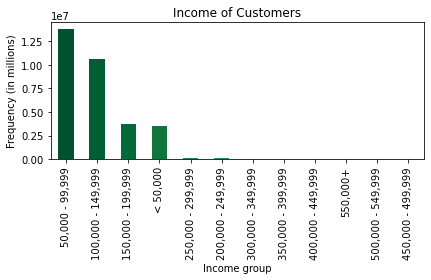

In [219]:
# Create a bar chart showing the distribution of customers by income
bar_income = df_final['income_group'].value_counts().plot.bar(color = sns.color_palette('YlGn_r', 21), xlabel= 'Income group', ylabel= 'Frequency (in millions)', title = 'Income of Customers')
plt.tight_layout()
# Save it
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

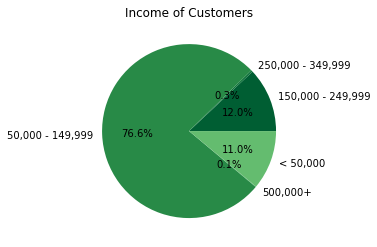

In [223]:
# Create pie chart of region where customers live
pie_income = df_final['income_group2'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('YlGn_r', 10), title= 'Income of Customers')
plt.ylabel('')
# Save it
pie_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income.png'))

In [225]:
# Create a subset only including people whos income is between 50,000-150,000 and others
df_income = df_final.loc[df_final['income_group2']== '50,000 - 149,999']
df_income['income_group2'].value_counts()

50,000 - 149,999    24418036
Name: income_group2, dtype: int64

In [227]:
df_income.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busy_days_by_orders,Busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_of_orders,order_frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,exclusion_flag,age_group,income_group,parental_status,order_time_group,weekday,department_name,profiling_variable,top_department,income_group2,age_group2,new_price_label
60,2168274,2,1,2,11,NaN,32792.0,1.0,0.0,Chipotle Beef & Pork Realstick,23.0,19.0,5.2,Mid-range product,Regularly days,Most orders,15,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,West,high_activity_customer,65 - 74,"50,000 - 99,999",Parent,9- 12hrs (Late Morning),Monday,Snacks,Older parent,Top 5 department,"50,000 - 149,999",Old,Mid-range product
61,2168274,2,1,2,11,NaN,47766.0,2.0,0.0,Organic Avocado,24.0,4.0,6.3,Mid-range product,Regularly days,Most orders,15,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,West,high_activity_customer,65 - 74,"50,000 - 99,999",Parent,9- 12hrs (Late Morning),Monday,Produce,Older parent,Top 5 department,"50,000 - 149,999",Old,Mid-range product
62,2168274,2,1,2,11,NaN,20574.0,3.0,0.0,Roasted Turkey,96.0,20.0,2.3,Low-range product,Regularly days,Most orders,15,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,West,high_activity_customer,65 - 74,"50,000 - 99,999",Parent,9- 12hrs (Late Morning),Monday,Deli,Older parent,Other,"50,000 - 149,999",Old,Low-range product
63,2168274,2,1,2,11,NaN,12000.0,4.0,0.0,Baked Organic Sea Salt Crunchy Pea Snack,72.0,13.0,10.9,Mid-range product,Regularly days,Most orders,15,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,West,high_activity_customer,65 - 74,"50,000 - 99,999",Parent,9- 12hrs (Late Morning),Monday,Pantry,Older parent,Other,"50,000 - 149,999",Old,High-range product
64,2168274,2,1,2,11,NaN,48110.0,5.0,0.0,Thin Stackers Brown Rice Lightly Salted,78.0,19.0,2.7,Low-range product,Regularly days,Most orders,15,Regular customer,7.515897,Low spender,13.0,Regular customer,Female,Alaska,68,7/4/2017,3,married,64940,West,high_activity_customer,65 - 74,"50,000 - 99,999",Parent,9- 12hrs (Late Morning),Monday,Snacks,Older parent,Top 5 department,"50,000 - 149,999",Old,Low-range product


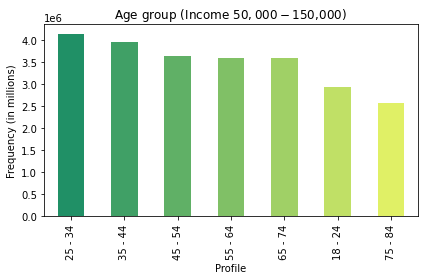

In [229]:
# Create bar graph of the age group of our new subset of customers
bar_new_age = df_income['age_group'].value_counts().plot.bar(color = sns.color_palette('summer', 7), xlabel= 'Profile', ylabel= 'Frequency (in millions)', title = 'Age group (Income $50,000 - $150,000)')
plt.tight_layout()
bar_new_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_new_age.png'))

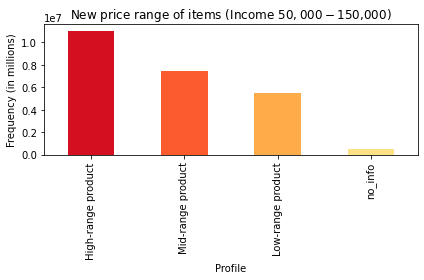

In [231]:
# Create bar graph of the new price label of our new subset of customers
bar_new_price_label = df_income['new_price_label'].value_counts().plot.bar(color = sns.color_palette('YlOrRd_r', 4), xlabel= 'Profile', ylabel= 'Frequency (in 10 millions)', title = 'New price range of items (Income $50,000 - $150,000)')
plt.tight_layout()
bar_new_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_new_price_label.png'))

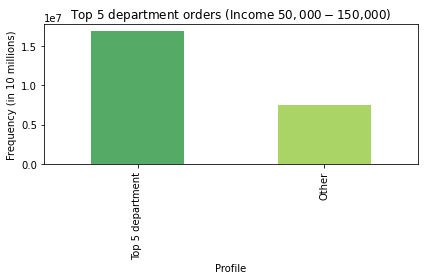

In [233]:
# Create bar graph of the departmetns our new subset of customers buy from
bar_new_top_dept = df_income['top_department'].value_counts().plot.bar(color = sns.color_palette('summer', 2), xlabel= 'Profile', ylabel= 'Frequency (in 10 millions)', title = 'Top 5 department orders (Income $50,000 - $150,000)')
plt.tight_layout()
bar_new_top_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_new_top_dept_label.png'))

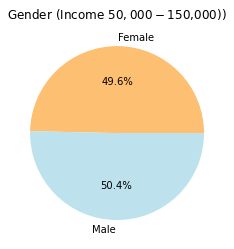

In [240]:
# Create pie chart of gender of new group
pie_gender = df_final['gender'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('RdYlBu', 2), title= 'Gender (Income $50,000 - $150,000))')
plt.ylabel('')
# Save it
pie_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_gender.png'))

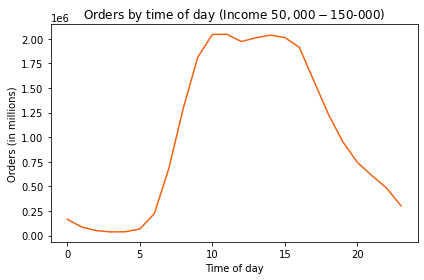

In [244]:
# Another way to get the same graph, but faster!
new_count_orders_hour = df_income.groupby('order_time').agg({'order_number': ['count']})
# Create line graph
line_new_count_orders_hour = new_count_orders_hour.plot.line(color = '#f6600e', xlabel= 'Time of day', ylabel= 'Orders (in millions)', title = 'Orders by time of day (Income $50,000 - $150-000)', legend=False)
plt.tight_layout()
# Save it                                                                 
line_new_count_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'new_line_count_orders_hour.png'))

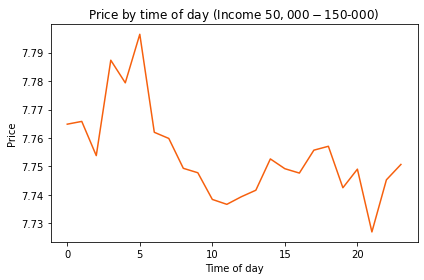

In [245]:
# Create a line graph showing the average price of items ordered (new income group)
# Mean price per hour
mean_new_prices_hour = df_income.groupby('order_time').agg({'prices': ['mean']})
# Create line graph
line_new_time_prices = mean_new_prices_hour.plot.line(color = '#f6600e', xlabel= 'Time of day', ylabel= 'Price', title = 'Price by time of day (Income $50,000 - $150-000)', legend=False)
plt.tight_layout()
# Save it                                                                 
line_new_time_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_new_time_prices.png'))

# THE END!!!